# **Mercedes Price Prediction**

### **Objective-**
##### Our goal is to build a model that will allow us to predict the price of the Mercedes Car.

### **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [2]:
data = pd.read_csv('./merc.csv')

In [3]:
# lets check the shape of data
data.shape

(13119, 9)

In [4]:
# checking first five rows of dataset
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
data['transmission'] = data['transmission'].map({'Automatic':'Automatic',
                                                'Manual':'Manual',
                                                'Semi-Auto':'Semi_Auto',
                                                'Other':'Other'})

### **Data Description**

* model : Model of car
* year : registration year
* price : car price in pound
* Transmission : Type of gear
* mileage : distance used
* fuelType : Fuel type
* tax : tax
* mpg : Miles per gallon (1 galon = 3,78541178 liters)
* engine size : Size of engine (liters)

In [6]:
# checking for missing values 
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

##### We can see that there are no missing values present in data.

In [7]:
# summary statistics 
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


### **Exploratory Data Analysis(EDA)**

<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Correlation Analysis
</div>

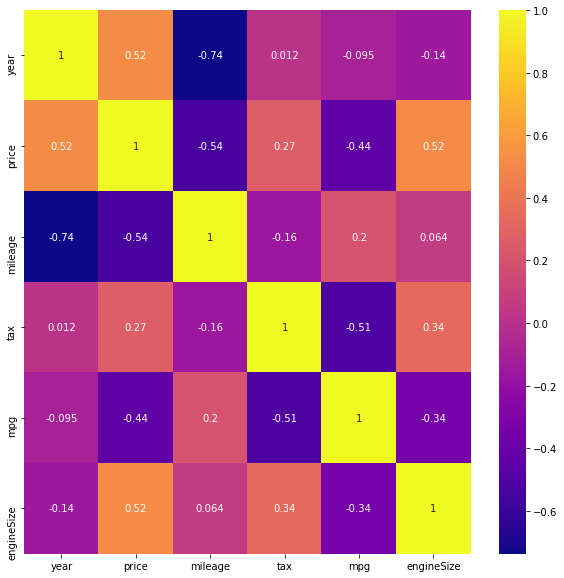

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='plasma')
plt.show()

* Mileage negatively affects price which could be result of caution.
* Engine size have strong correlation with target.
* There exists a multicolinearity between mileage and year.

<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Analysis of Models
</div>

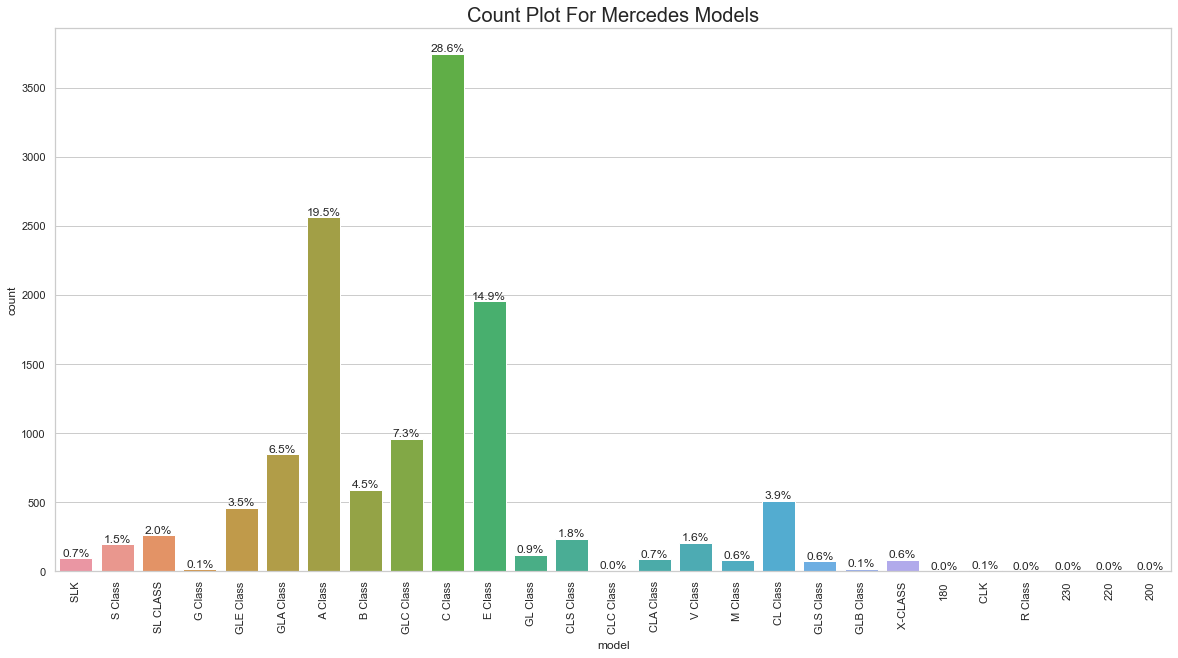

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
total = float(len(data))
ax = sns.countplot(x="model", data=data)
plt.xticks(rotation=90)
plt.title("Count Plot For Mercedes Models", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

##### Cleary Mercedes C Class is most common model followed by A Class.

<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Analysis of Price and Year
</div>

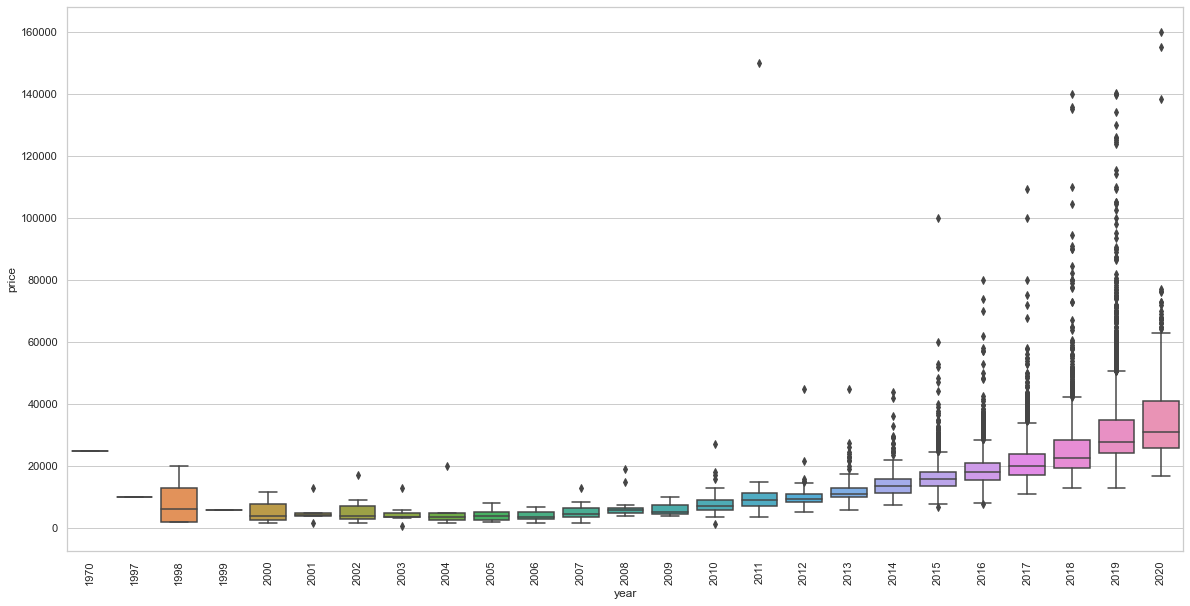

In [10]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x='year', y="price", data=data)
plt.xticks(rotation=90)
plt.show()

##### Price of newest models is high compared to old models.

In [11]:
data[data['year'] == 1970]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12072,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0


##### In year 1970, mean of price is too high and it only contains one value(outlier) so I am dropping that value from original data.

In [12]:
data.drop(12072,axis=0,inplace=True)

<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Analysis of Price and Transmission
</div>

<Figure size 864x576 with 0 Axes>

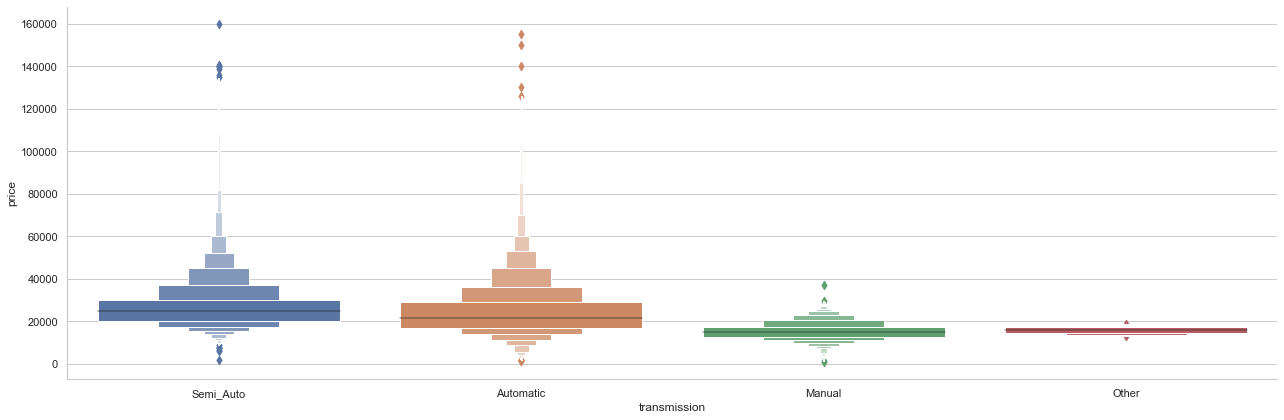

In [13]:
# Plot Transmission vs Price
plt.figure(figsize=(12, 8))
sns.catplot(y='price',x='transmission',data= data.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [14]:
data[data['transmission'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
12762,SLK,2015,12995,Other,39000,Diesel,150,56.5,2.1


<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Analysis of Price and FuelType
</div>

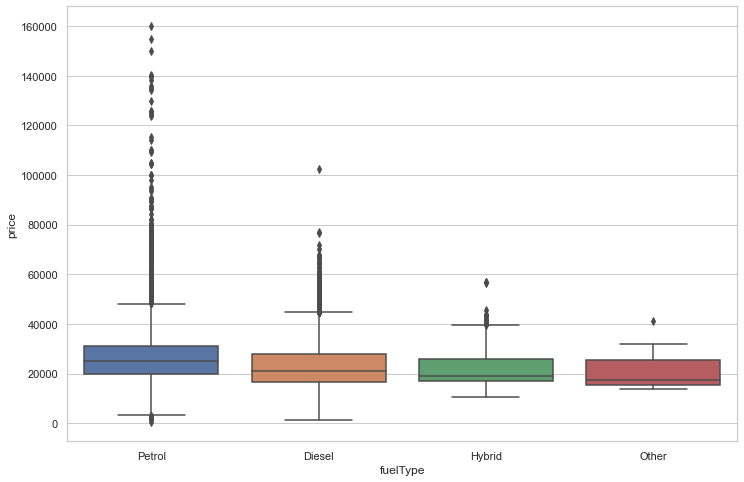

In [15]:
plt.figure(figsize=(12, 8))
fig = sns.boxplot(x='fuelType', y="price", data=data.sort_values('price',ascending=False))
plt.show()

##### It is clear from the above figure that the Petrol cars are relatively more costly than the rest because it contains some high range values.

<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Analysis of Price and Continuous Variables
</div>

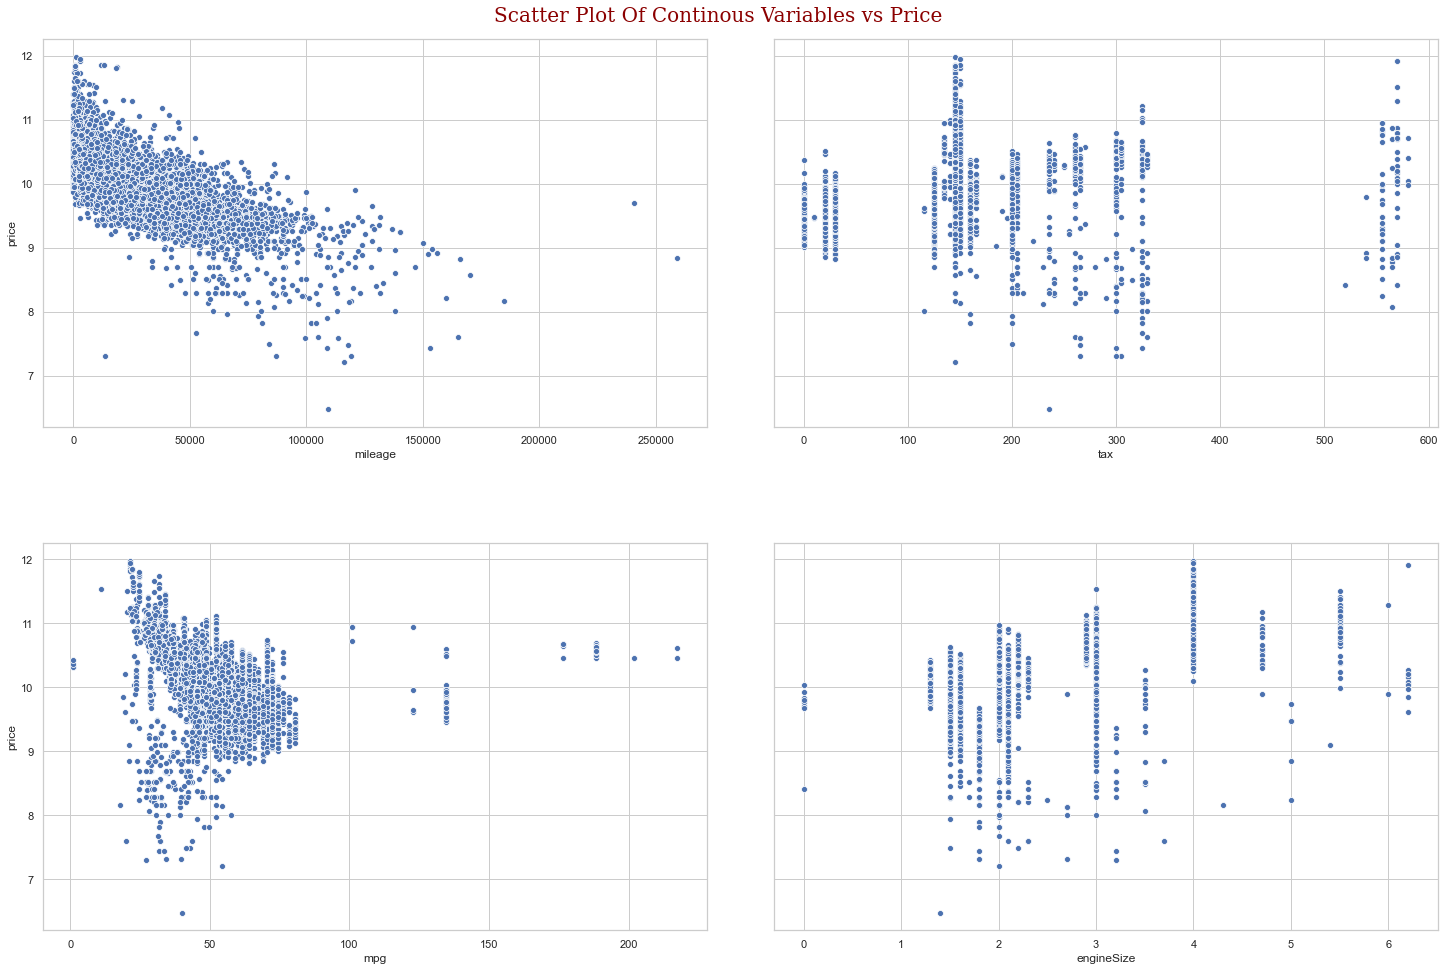

In [16]:
cols = ['mileage', 'tax', 'mpg','engineSize']

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig,axes = plt.subplots(2,2,figsize=(25,15),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continous Variables vs Price',fontsize = 20, fontdict=font)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(cols):
    #using log transformation
    x = data[col]
    y = data['price'].apply(np.log)
    sns.scatterplot(x, y ,ax=axes[i])

##### Mileage,engineSize and mpg has a strong association with the price.

<div style="color:red;
           display:fill;
           font-size:130%;
           font-family:Argentina;
           letter-spacing:0.5px">
Distribution of Target variable - Price
</div>

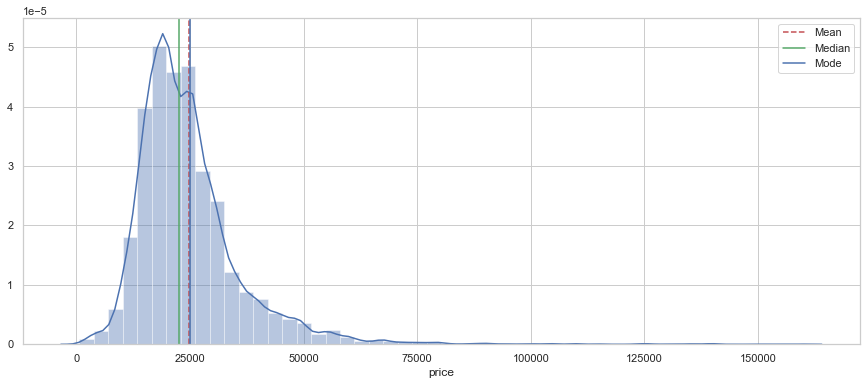

In [17]:
# lets check the distribution of target variable - price
f,ax = plt.subplots(1, sharex=True,figsize=(15,6))
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode().values[0]

sns.distplot(data['price'],ax = ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='-', label="Median")
ax.axvline(mode_price, color='b', linestyle='-', label="Mode")

ax.legend()
plt.xlim()
plt.show()

* Majority of cars having price around 15000-30000 pounds.
* There are very minimum cars having price between 50000 to 160000 pound.
* We can see that mean price is greater than median of price, also long tail of distribution is longer on right hand side as compared to left hand side which shows that distribution is positively skewed.
* We can transform it to represent a normal distribution.Lets try to remove some outliers and see if that helps here.

In [18]:
# dropping 1 percent of the data ie. Outlier values.
data = data.sort_values('price',ascending = False).iloc[int(len(data) * 0.01):]

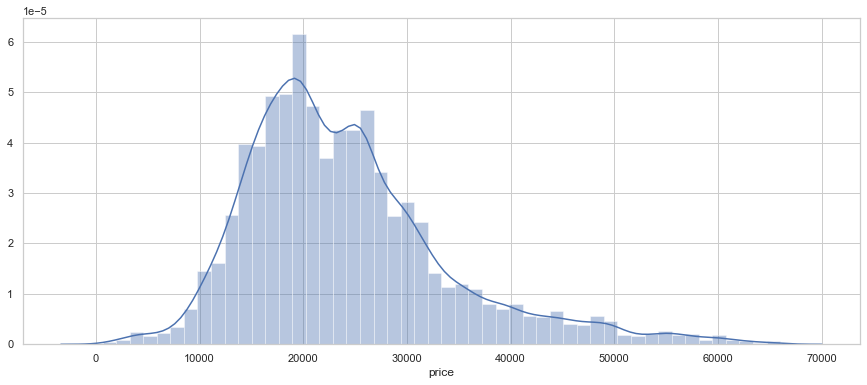

In [19]:
plt.figure(figsize=(15,6))
sns.distplot(data['price'])
plt.show()

##### So Now, the distribution appears close to normal.

In [20]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

### **Handling Categorical Features**

In [21]:
data['transmission'].replace({'Other':'Semi_Auto'},inplace=True)
data['transmission'].value_counts()

Semi_Auto    6771
Automatic    4772
Manual       1444
Name: transmission, dtype: int64

In [22]:
data['fuelType'].replace({'Hybrid':'Other'},inplace=True)
data['fuelType'].value_counts()

Diesel    9175
Petrol    3632
Other      180
Name: fuelType, dtype: int64

In [23]:
# Using get_dummies where data are not in any order and LabelEncoder when data is in order.

categorical_col = ['model','transmission','fuelType']
dummies = pd.get_dummies(data[categorical_col])

# removing dummy trap variables
dummies.drop(['model_230','transmission_Semi_Auto','fuelType_Other'],axis=1,inplace=True)

In [24]:
# concat data and dummies df
data = pd.concat([data,dummies],axis=1)

# drop the original categorical columns
data.drop(categorical_col,axis=1,inplace=True)

In [25]:
# lets create a feature age = current year - year
current_year = 2021
data['Age'] = current_year - data['year']
# drop year
data.drop('year',axis=1,inplace=True)

In [26]:
data.shape

(12987, 36)

In [27]:
data.head()

,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,model_ CLA Class,...,model_ V Class,model_ X-CLASS,model_180,model_200,model_220,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol,Age
6177,65990,5076,150,30.4,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
5779,65990,999,145,28.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3191,65980,3999,145,28.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4727,65000,3398,145,27.2,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
8814,64999,119,145,40.9,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [28]:
data.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A Class',
       'model_ B Class', 'model_ C Class', 'model_ CL Class',
       'model_ CLA Class', 'model_ CLC Class', 'model_ CLK',
       'model_ CLS Class', 'model_ E Class', 'model_ G Class',
       'model_ GL Class', 'model_ GLA Class', 'model_ GLB Class',
       'model_ GLC Class', 'model_ GLE Class', 'model_ GLS Class',
       'model_ M Class', 'model_ R Class', 'model_ S Class', 'model_ SL CLASS',
       'model_ SLK', 'model_ V Class', 'model_ X-CLASS', 'model_180',
       'model_200', 'model_220', 'transmission_Automatic',
       'transmission_Manual', 'fuelType_Diesel', 'fuelType_Petrol', 'Age'],
      dtype='object')

### **Model Building**

In [29]:
# Separate Dependent and Independent Variables
X = data.drop('price',axis=1)
y = data['price']

In [30]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [31]:
# Models
models=[LinearRegression(),RandomForestRegressor(random_state=50)]
model_names=['LinearRegression','RandomForestRegressor']
score = []
dictionary = {}
for model in range(len(models)):
    reg = models[model]
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    score.append(r2_score(y_pred,y_test))
     
dictionary = {'Model Names':model_names,'r2 Score':score}
# Put the scores in a data frame.
score_df = pd.DataFrame(dictionary)

In [32]:
score_df

,Model Names,r2 Score
0,LinearRegression,0.753575
1,RandomForestRegressor,0.932840


##### Random Forest Performed Best.

### Save Model

In [33]:
rf = RandomForestRegressor(random_state=50)
rf.fit(X_train,y_train)
ypred_rf = rf.predict(X_test)
print(r2_score(y_test,ypred_rf))


0.9361954689853145


In [34]:
# save the model to disk
import pickle
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))


In [35]:
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)